# Digit Recognition Project

## Problem Statement
- The ML objective is to develop a ML model that recognizes hand-written digits and outputs the digit number.  The input will be a normalized image about each digit, and the output will be the recognized number for each digit.  

## Data Analysis

In [1]:
# Load required packages for datasets and plot
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
# Load training data
digits = datasets.load_digits()

In [3]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

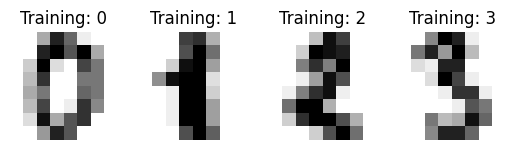

In [16]:
# visualize training data

images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [11]:
digits.data.shape

(1797, 64)

In [7]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [13]:
len(digits.target)

1797

## Training

In [20]:
# Perform TTS
from sklearn.model_selection import train_test_split

X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
X_test.shape

(594, 64)

In [23]:
X_train.shape

(1203, 64)

In [27]:
y_train.shape

(1203,)

In [28]:
y_test.shape

(594,)

In [40]:
# SVM
from sklearn import svm

SVC_classifier = svm.SVC(C=1.0, kernel='rbf', gamma=0.001)
SVC_classifier.fit(X_train, y_train)

SVC(gamma=0.001)

In [36]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier

RF_classifier = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=3, 
                min_samples_split=2, min_samples_leaf=1, bootstrap=True,oob_score=True, random_state=42)
RF_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, oob_score=True, random_state=42)

## Evaluation

In [42]:
# Evaluation for SVC
from sklearn import metrics

expected = y_test
predicted = SVC_classifier.predict(X_test)

print("Classification report for SVC %s:\n%s\n"
      % (SVC_classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))



Classification report for SVC SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       0.98      1.00      0.99        55
           2       1.00      1.00      1.00        52
           3       0.98      0.96      0.97        56
           4       1.00      1.00      1.00        64
           5       0.99      1.00      0.99        73
           6       1.00      1.00      1.00        57
           7       0.98      0.98      0.98        62
           8       0.98      0.98      0.98        52
           9       0.99      0.97      0.98        68

    accuracy                           0.99       594
   macro avg       0.99      0.99      0.99       594
weighted avg       0.99      0.99      0.99       594


Confusion matrix:
[[55  0  0  0  0  0  0  0  0  0]
 [ 0 55  0  0  0  0  0  0  0  0]
 [ 0  0 52  0  0  0  0  0  0  0]
 [ 0  0  0 54  0  1  0  0  1  0]
 [ 0  0  0  0 64  0  0  0  0  0]
 [ 0  0  

In [43]:
# Evaluation for Random Forests 
from sklearn import metrics

expected = y_test
predicted = RF_classifier.predict(X_test)

print("Classification report for Random Forests %s:\n%s\n"
      % (RF_classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for Random Forests RandomForestClassifier(max_depth=3, oob_score=True, random_state=42):
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.87      0.73      0.79        55
           2       0.79      0.92      0.85        52
           3       0.84      0.95      0.89        56
           4       0.95      0.92      0.94        64
           5       0.97      0.84      0.90        73
           6       0.97      0.98      0.97        57
           7       0.85      1.00      0.92        62
           8       0.90      0.71      0.80        52
           9       0.80      0.82      0.81        68

    accuracy                           0.89       594
   macro avg       0.89      0.89      0.88       594
weighted avg       0.89      0.89      0.88       594


Confusion matrix:
[[54  0  0  0  1  0  0  0  0  0]
 [ 0 40  5  3  1  1  0  0  1  4]
 [ 0  0 48  2  0  0  0  0  2  0]
 [ 0  1  1 5